In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import string
import re
import operator
from matplotlib import rcParams
from nltk import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Generate Word Cloud

In [11]:
def create_wordcloud(fileloc,imgname,imageloc):
    company_data=pd.read_csv(fileloc)#Smasung,Apple,LG
    #company_data=pd.read_excel(fileloc)#sony
    applications_split=company_data["applications"].str.split(",",n=1,expand=True)#Samsung,sony,LG
    applications_split.columns=["Application_Date","Application_number"]#Samsung,sony
    application_year=applications_split["Application_Date"].str.split("-",n=3,expand=True)#Samsung,sony,LG
    #application_year=company_data.Application_Date.str.split("-",n=3,expand=True)#Apple
    application_year.columns=["Year","Month","Day"]#Samsung,sony,LG
    #application_year.columns=["Day","Month","Year"]#Apple
    company_final=pd.concat([company_data.reset_index(drop=True),application_year],axis=1)
    company_2005=company_final[company_final.Year=="2005"]
    company_2006=company_final[company_final.Year=="2006"]
    company_2007=company_final[company_final.Year=="2007"]
    company_2008=company_final[company_final.Year=="2008"]
    company_2009=company_final[company_final.Year=="2009"]
    company_2010=company_final[company_final.Year=="2010"]
    company_2011=company_final[company_final.Year=="2011"]
    company_2012=company_final[company_final.Year=="2012"]
    company_2013=company_final[company_final.Year=="2013"]
    company_2014=company_final[company_final.Year=="2014"]
    company_2015=company_final[company_final.Year=="2015"]
    company_2016=company_final[company_final.Year=="2016"]
    company_2017=company_final[company_final.Year=="2017"]
    company_2018=company_final[company_final.Year=="2018"]
    years=["company_2005","company_2006","company_2007","company_2008",
           "company_2009","company_2010","company_2011","company_2012",
           "company_2013","company_2014","company_2015","company_2016","company_2017","company_2018"]
    
    stopwords = set(STOPWORDS)
    stopwords.update(["a","accordance","according","all","also","an","and","join","may","include","may include"
                     "another","are","as","at","be","because","been","being","by",
                     "claim","comprises","corresponding","could","described","desired",
                     "do","does","each","embodiment","fig","figs","for","from","further","generally",
                     "had","has","have","having","herein","however","if","in","into","invention","is","it",
                     "its","means","not","now","of","on","onto","or","other","particularly","preferably",
                     "preferred","present","provide","provided","provides","relatively","respectively","said",
                     "should","since","some","such","suitable","than","that","the","their","then","there","thereby",
                     "therefore","thereof","thereto","these","they","this","those","thus","to","use","various","was","includes","including",
                     "were","what","when","where","whereby","wherein","which","while","who","will","with","would","method","Methods","device"])
    stopwords=sorted(stopwords)
    for i in years:
        data=pd.DataFrame(eval(i))
        data.patent_abstract.to_csv(i+".txt",header=False)
        file_content=open (i+".txt", encoding="utf8").read()
        file_char = re.sub('[(),\n",.''\]+[0-9]+', '',file_content)
        cv=CountVectorizer(ngram_range=(1,2),stop_words=sorted(stopwords))
        cv_fit=cv.fit_transform([file_char])
        word_list=cv.get_feature_names()
        count_list=cv_fit.toarray().sum(axis=0)
        word_count=dict(zip(word_list,count_list))
        sorted_d = sorted(word_count.items(), key=operator.itemgetter(1),reverse=True)
        pd.DataFrame(sorted_d).to_csv(imageloc+imgname+i+".csv")
        wordcloud = WordCloud(stopwords=sorted(stopwords),max_words=500,
                                  max_font_size=50,
                                  min_font_size=15,
                                  width=1200, height=900,
                                  colormap=matplotlib.cm.inferno,
                                  random_state=42, background_color="white").generate_from_frequencies(word_count)
        
        wordcloud.to_file(imageloc+imgname+i+".png")
        print("Completed : "+i)
        
        

In [12]:
fileloc="E:\\BABI\\Capstone\\Capstone\\Capstone_Legal Analytics\\Data\\wordcloud\\samsung\\Samsung_Abstract_Unique.csv"
imgname="Samsung"
imageloc="E:\\BABI\\Capstone\\Capstone\\Capstone_Legal Analytics\\Data\\wordcloud\\samsung\\1gram\\"
create_wordcloud(fileloc,imgname,imageloc)

Completed : company_2005
Completed : company_2006
Completed : company_2007
Completed : company_2008
Completed : company_2009
Completed : company_2010
Completed : company_2011
Completed : company_2012
Completed : company_2013
Completed : company_2014
Completed : company_2015
Completed : company_2016
Completed : company_2017
Completed : company_2018


# Comparison Check

In [3]:
def compare_bigrams(file1,file2,n):
    data1=pd.read_csv(file1,header=0,names=["Text","Count"])
    data2=pd.read_csv(file2,header=0,names=["Text","Count"])
    list1=list(data1["Text"])[0:n]
    list2=list(data2["Text"])[0:n]
    match=[]
    nomatch=[]
    for item in list1:
        if item in list2:
            match.append(item)
        else:
            nomatch.append(item)
    nomatch_data=pd.DataFrame(nomatch)
    nomatch_data.columns=["Text"]
    result=pd.merge(nomatch_data,data2,how="inner",on="Text")
    result_list=[result.columns.values.tolist()] + result.values.tolist()
    result_list=dict(result_list[1:])
    wordcloud = WordCloud(max_words=500,
                                  max_font_size=50,
                                  min_font_size=15,
                                  width=1200, height=900,
                                  colormap=matplotlib.cm.inferno,
                                  random_state=42, background_color="white").generate_from_frequencies(result_list)
    plt.figure(figsize=(20,10), facecolor='k')
    # add title to the graph
    plt.title("Unique words in Samsung Patent ", fontsize=40,color='white')
    plt.imshow(wordcloud)
    plt.show()
    #wordcloud.to_file()  
    #return(match,nomatch)
    print("Matched Strings : {}".format(len(match)))
    print("Un-Matched Strings : {} ".format(len(nomatch)))

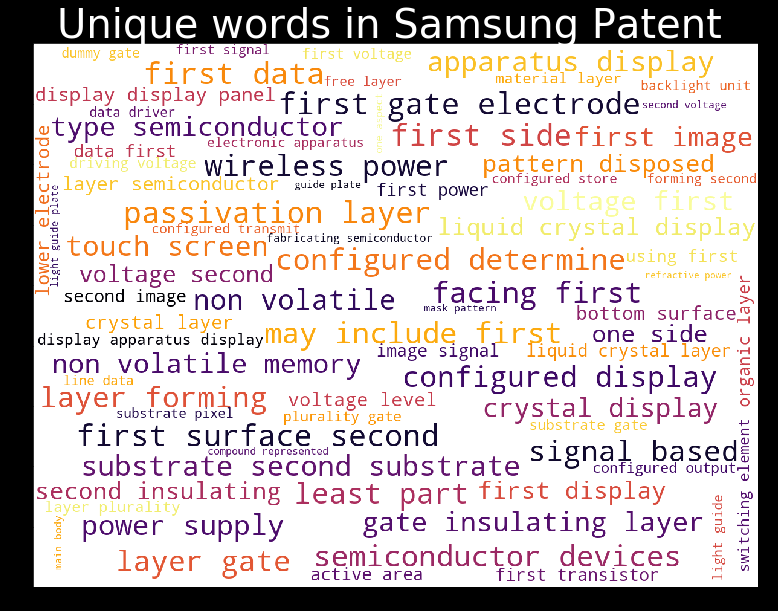

Matched Strings : 217
Un-Matched Strings : 83 


In [5]:
file1="E:\\BABI\\Capstone\\Capstone\\Capstone_Legal Analytics\\Data\\wordcloud\\samsung\\Samsungcompany_2016.csv"
file2="E:\\BABI\\Capstone\\Capstone\\Capstone_Legal Analytics\\Data\\wordcloud\\samsung\\Samsungcompany_2017.csv"
n=300
compare_bigrams(file1,file2,n)

In [4]:
data1=pd.read_csv("E:\\BABI\\Capstone\\Capstone\\Capstone_Legal Analytics\\Data\\wordcloud\\samsung\\Samsungcompany_2006.csv",header=0,names=["Text","Count"])
data2=pd.read_csv("E:\\BABI\\Capstone\\Capstone\\Capstone_Legal Analytics\\Data\\wordcloud\\samsung\\Samsungcompany_2007.csv",header=0,names=["Text","Count"])
list1=list(data1["Text"])[0:500]
list2=list(data2["Text"])[0:500]
match=[]
nomatch=[]
for item  list1:
    if item in list2:
        match.append(item)
    else:
        nomatch.append(item)


In [5]:
nomatch_data.head()

,Text
0,organic semiconductor
1,gate pattern
2,source drain electrodes
3,flat panel
4,flat panel display


In [12]:
result=pd.merge(nomatch_data,data2,how="inner",on="Text")